<a href="https://colab.research.google.com/github/gehaddd/PRODIGY_ML-_01/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt


In [108]:
from google.colab import files
f=files.upload()

Saving train(1).csv to train(1) (4).csv


In [109]:
training_data=pd.read_csv('train(1).csv')

In [110]:
from google.colab import files
f=files.upload()

Saving test(1).csv to test(1) (6).csv


In [111]:
training_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [119]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalBath
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1.5
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2.5
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,2.5
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,1.5
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1.5
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,2.0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1.5


In [120]:
#The multiplication by 0.5 (which is equivalent to dividing by 2) is used because i  convert half bathrooms into the equivalent fraction of a full bathroom.
training_data['TotalBath'] = training_data['FullBath'] + (0.5 * training_data['HalfBath']) +training_data['BsmtFullBath'] + (0.5 * training_data['BsmtHalfBath'])
print(training_data[['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBath']].head())

   FullBath  HalfBath  BsmtFullBath  BsmtHalfBath  TotalBath
0         2         1             1             0        3.5
1         2         0             0             1        2.5
2         2         1             1             0        3.5
3         1         0             1             0        2.0
4         2         1             1             0        3.5


In [121]:
features_train=training_data[['TotalBath','LotArea','BedroomAbvGr']]

In [122]:
#The multiplication by 0.5 (which is equivalent to dividing by 2) is used because i  convert half bathrooms into the equivalent fraction of a full bathroom.
test_data['TotalBath'] = test_data['FullBath'] + (0.5 * test_data['HalfBath']) +test_data['BsmtFullBath'] + (0.5 * test_data['BsmtHalfBath'])
print(test_data[['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBath']].head())

   FullBath  HalfBath  BsmtFullBath  BsmtHalfBath  TotalBath
0         1         0           0.0           0.0        1.0
1         1         1           0.0           0.0        1.5
2         2         1           0.0           0.0        2.5
3         2         1           0.0           0.0        2.5
4         2         0           0.0           0.0        2.0


In [123]:
test_data.dropna(subset=['TotalBath','LotArea','BedroomAbvGr'], inplace=True)
features_test=test_data[['TotalBath','LotArea','BedroomAbvGr']]

In [124]:
x_train=features_train
y_train=training_data['SalePrice']
x_test=features_test



In [125]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [126]:
predictions=model.predict(x_test)

In [127]:
predictions

array([107713.09006916, 142045.78331656, 202320.83536457, ...,
       179809.43768493, 137794.85804167, 197651.03951241])

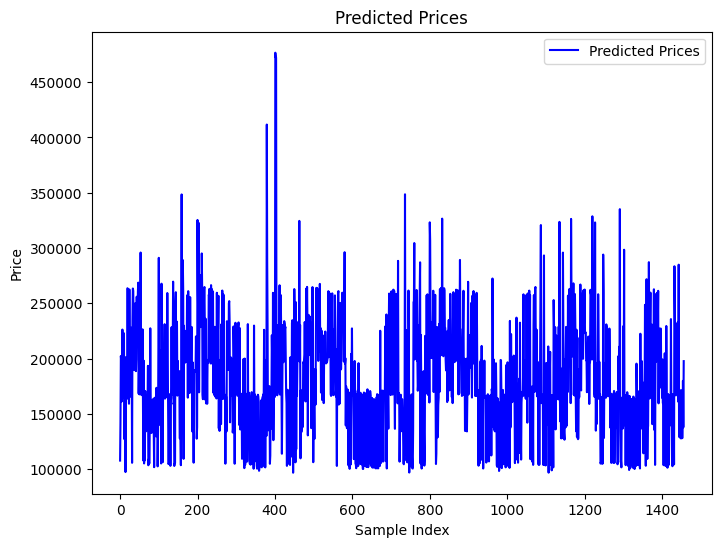

In [147]:
# Assuming y_pred contains the predicted prices
plt.figure(figsize=(8, 6))
plt.plot(predictions, color='blue', label='Predicted Prices')
plt.title('Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [128]:

submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})


submission_df.to_csv('submission.csv', index=False)


In [72]:
from google.colab import files

# Download the submission file to your local machine
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

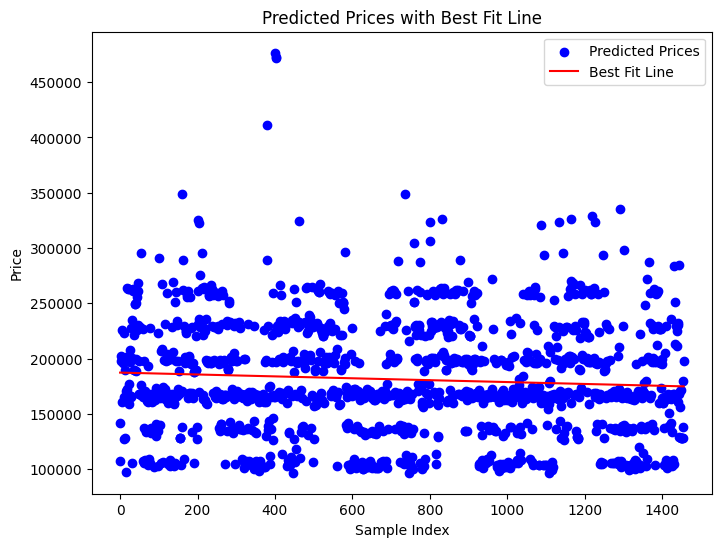

In [138]:


plt.figure(figsize=(8, 6))
plt.scatter(range(len(predictions)), predictions, color='blue', label='Predicted Prices')

slope, intercept = np.polyfit(range(len(predictions)), predictions, 1)
best_fit_line = slope * np.array(range(len(predictions))) + intercept

# Plot the best fit line
plt.plot(best_fit_line, color='red', label='Best Fit Line')

plt.title('Predicted Prices with Best Fit Line')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


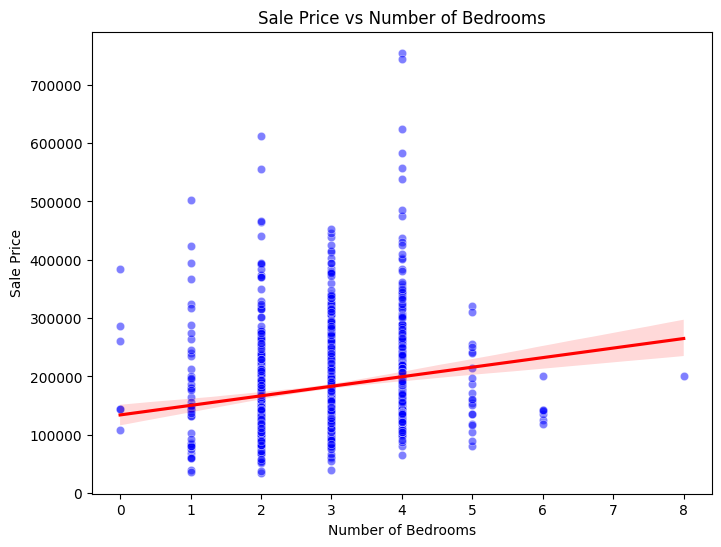

In [145]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=training_data, color='blue', alpha=0.5)

sns.regplot(x='BedroomAbvGr', y='SalePrice', data=training_data, scatter=False, color='red')

plt.title('Sale Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()
